# Stochastic Simulation Assignment 2

## Discrete Event Simulation - Simple Queues

_Authors: Sai Vinay Vardhan Daliparthi (15073815), Boyan Mihaylov (15067602), Nitai Nijholt (12709018)_

1) Queuing theory tells us that for FIFO scheduling the average waiting times are shorter for an
M/M/n queue and a system load ρ and processor capacity μ than for a single M/M/1 queue
with the same load characteristics (and thus an n-fold lower arrival rate). Of course, ρ must be
less than one, but the experiment only becomes interesting when ρ is not much less than one.
Look up and/or derive this theoretical result, at least for n=2. Describe how it is
derived. Can you also give a non-mathematical explanation? 

Statement to prove: $W_{n} \leq W_{1}$ 

Facts & Definitions:

1. systemload 1 server = $\rho_{1} = \frac{\lambda_{1}}{\mu} $ [1]
2. systemload n servers = $\rho_{n} = \frac{\lambda_{n}}{n\mu}$ [2]
3. It is given that the load characteristics of the system are equal, meaning $\rho_{1} = \rho_{n}$ where $\rho$ represents system load [3]
4. Little's law = $L = \lambda W$ [4]

Where \rho represents system load



From 3, we know: $\rho_{1} = \rho_{n}$ because the question gives that the load characteristics of the system are equal we assume $\mu_{1} = \mu_{n}$ 

Hence: $\rho_{1} = \rho_{n} = \frac{\lambda_{1}} {\mu}  = \frac{\lambda_{n}}{n\mu} $ [6]

From  6 we can see that:

$\lambda_{1} = \frac{\lambda_{n}}{n\mu}$, so for a system with n servers there is an n-fold lower arrival rate. [7]


We can rewrite Little law to get an expression for average waiting time W:

$W = \frac{L}{\lambda}$ [4]


We set out to prove $W_{n} \lt W_{1}$ by using 4 and rewriting Little Law, and then substituting in $\lambda$ :


$\frac{L}{\lambda_{n}}$ $\lt$ $\frac{L}{\lambda_{1}}$ 


We assume the average length of the que, $L$, is the same and using 7, we find:


$\frac{L}{\lambda_{n}}$ $\lt$  $\frac{L}{\frac{\lambda_{1}}{n}}$ 


$\frac{L}{\lambda_{n}}$  $\lt$ $\frac{nL}{\lambda_{1}}$ 

So for any n > 1, the average waiting time of a 1 server system is always higher than an n server system. This proof assumes that the system is in a steady state.

2) Write a DES program to verify this for n=1, n=2 and n=4. Make sure that your result
has a high and known statistical significance. How does the number of measurements

3) Also compare the result to that for an M/M/1 queue with shortest job first scheduling,
where you always give priority to the smallest jobs.


4) Now experiment with different service rate distributions. On the one hand try the
M/D/1 and M/D/n queues, on the other hand try a long-tail distribution. For the latter
you may e.g. use a distribution where 75% of the jobs have an exponential distribution
with an average service time of 1.0 and the remaining 25% an exponential distribution
with an average service time of 5.0 (an example of a hyperexponential distribution).
Write your program using SimPy.

## Simulations

In [1]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from simulation import *

### Simulation Test

In [2]:
env = simpy.Environment()
server = MultiServer(env, n=1, lambda_rate=0.5, mu=0.8)

env.process(server.setup_sim(print_progress=True))
env.run(until=100)

Created system with 1 servers and load 0.625.
Job 0 arrives at queue at time 0.20439884417697995
Job 0 is starting to be processed at time 0.20439884417697995
Job 0 is finished at 1.239368292743527
Job 1 arrives at queue at time 2.9845753165294147
Job 1 is starting to be processed at time 2.9845753165294147
Job 2 arrives at queue at time 4.309073746286237
Job 3 arrives at queue at time 4.8174973598000195
Job 4 arrives at queue at time 5.848250025119025
Job 1 is finished at 6.4392625973222675
Job 2 is starting to be processed at time 6.4392625973222675
Job 5 arrives at queue at time 6.706426165814252
Job 2 is finished at 6.727456688543797
Job 3 is starting to be processed at time 6.727456688543797
Job 3 is finished at 7.945436708338739
Job 4 is starting to be processed at time 7.945436708338739
Job 4 is finished at 9.789477356916287
Job 5 is starting to be processed at time 9.789477356916287
Job 6 arrives at queue at time 10.043881117461556
Job 5 is finished at 10.479665289719044
Job 6 

In [3]:
server.jobs

,jobID,arr_time,proc_time,leave_time,wait_delta
0,0000,0.204399,0.204399,1.239368,0.0
1,0001,2.984575,2.984575,6.439263,0.0
2,0002,4.309074,6.439263,6.727457,2.130189
3,0003,4.817497,6.727457,7.945437,1.909959
4,0004,5.84825,7.945437,9.789477,2.097187
5,0005,6.706426,9.789477,10.479665,3.083051
6,0006,10.043881,10.479665,13.628294,0.435784
7,0007,13.531339,13.628294,14.436916,0.096955
8,0008,16.574031,16.574031,16.624497,0.0
9,0009,16.873912,16.873912,19.819277,0.0


In [4]:
# Filter completed jobs
completed_jobs = server.jobs[server.jobs['proc_time'].isnull() == False]

print(completed_jobs)
waiting_times = completed_jobs['proc_time'] - completed_jobs['arr_time']
print(f"Average waiting time: {np.mean(waiting_times)}")

   jobID   arr_time  proc_time leave_time wait_delta
0   0000   0.204399   0.204399   1.239368        0.0
1   0001   2.984575   2.984575   6.439263        0.0
2   0002   4.309074   6.439263   6.727457   2.130189
3   0003   4.817497   6.727457   7.945437   1.909959
4   0004    5.84825   7.945437   9.789477   2.097187
5   0005   6.706426   9.789477  10.479665   3.083051
6   0006  10.043881  10.479665  13.628294   0.435784
7   0007  13.531339  13.628294  14.436916   0.096955
8   0008  16.574031  16.574031  16.624497        0.0
9   0009  16.873912  16.873912  19.819277        0.0
10  0010   19.90534   19.90534  20.099041        0.0
11  0011   20.19032   20.19032  20.336946        0.0
12  0012  21.056331  21.056331  21.946902        0.0
13  0013  21.470699  21.946902  22.772279   0.476204
14  0014  21.999747  22.772279  22.901887   0.772532
15  0015  24.605955  24.605955  25.936694        0.0
16  0016  24.935973  25.936694   26.87511   1.000722
17  0017  25.082342   26.87511  27.157162   1.

### Simulations with Varying n

The following procedure runs multiple simulations for $M/M/n$ systems with $n = 1, 2, 4$. Furthermore, different arrival rates are explored ($0.1<\lambda<0.95$ per server), the rate being scaled to the number of servers, so that the total system load $\rho$ is comparable between the different system sizes.

In [5]:
# Simulation parameters
n_range = [1, 2, 4]
mu_base = 1.0
lambda_range = np.arange(0.1, 1.0, 0.05)
rho_range = lambda_range / mu_base
sim_results = pd.DataFrame(columns=['n', 'rho', 'simID', 'jobID', 'arr_time', 'proc_time', 'leave_time', 'wait_delta'])
runtime = 100
n_sims = 50

np.random.seed(13)

In [6]:
# Run simulations for different number of servers n and for different arrival rates
for n in n_range:
    for i, lambda_rate in enumerate(lambda_range):
        for s in range(n_sims):
            env = simpy.Environment()
            server = MultiServer(env, n=n, lambda_rate=lambda_rate*n, mu=mu_base)
            env.process(server.setup_sim(print_progress=False))
            env.run(until=runtime)
            run_results = server.jobs
            run_results.insert(0, 'simID', np.full(server.jobs.shape[0], s))
            run_results.insert(0, 'rho', np.full(server.jobs.shape[0], rho_range[i]))
            run_results.insert(0, 'n', np.full(server.jobs.shape[0], n))
            sim_results = pd.concat([sim_results, run_results], ignore_index=True)

sim_results.to_csv("sim_results_MMn.csv")

sim_results

Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers and load 0.1.
Created system with 1 servers an

,n,rho,simID,jobID,arr_time,proc_time,leave_time,wait_delta
0,1,0.10,0,0000,15.037383,15.037383,16.776238,0.0
1,1,0.10,0,0001,17.749451,17.749451,21.346704,0.0
2,1,0.10,0,0002,51.489904,51.489904,52.429061,0.0
3,1,0.10,0,0003,57.531185,57.531185,58.557328,0.0
4,1,0.10,0,0004,72.471162,72.471162,72.506827,0.0
...,...,...,...,...,...,...,...,...
331542,4,0.95,49,0379,99.108718,None,None,None
331543,4,0.95,49,0380,99.211536,None,None,None
331544,4,0.95,49,0381,99.24171,None,None,None
331545,4,0.95,49,0382,99.573522,None,None,None


In [ ]:
# Load data from previous experiment
sim_results = pd.read_csv("sim_results_MMn.csv")

Mean waiting time for 1 servers rho = 0.9500000000000003: 5.235702684918375
Mean waiting time for 2 servers rho = 0.9500000000000003: 3.765415504320639
Mean waiting time for 4 servers rho = 0.9500000000000003: 1.9489298926801317


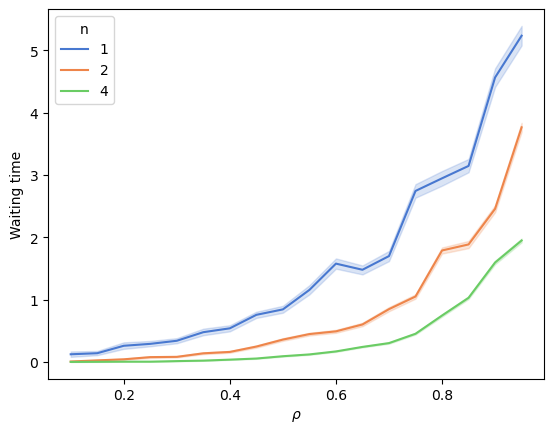

In [7]:
# Plot convergence of waiting time with increasing rho

rho_observed = rho_range[-1]

sim_results_subset = sim_results[sim_results['rho'] == rho_observed]
for n in n_range:
    sim_results_subset_n = sim_results_subset[sim_results_subset['n'] == n]
    print(f"Mean waiting time for {n} servers rho = {rho_observed}: {sim_results_subset_n['wait_delta'].mean()}")

fig, ax = plt.subplots()
sns.lineplot(sim_results, x='rho', y='wait_delta', palette='muted', hue='n', errorbar=('ci', 95), ax=ax)
ax.set_xlabel('$\\rho$')
ax.set_ylabel('Waiting time')
ax.invert_yaxis()

The procedure below calculates the number of simulations needed until a specific width of the confidence interval is obtained. To obtain better statistical significance, the initial number of simulations `n_sims` is subdivided into smaller portions of size `n_sims/n_sim_partitions`. For each partition of the simulations, the number of results is incrementally increased, with the confidence interval recalculated for each step. Whenever the confindence interval drops beneath a specific threshold, the number of observed simulations before convergence $s_c$ is saved.

By having multiple partitions of the result, this procedure can be applied multiple times for the same set of parameters and statistical operations can be performed on the varying values of $s_c$.

In [12]:
ci_treshold = 0.1
n_sim_partitions = 5

# DataFrame for saving number of simulations until critical ci threshold
df_rho_s_data = pd.DataFrame(columns=['n', 'rho', 's', 'Permutation'])

sim_results_clean = sim_results[sim_results['wait_delta'].isnull() == False]

entry_ct = 0
for i, n in enumerate(n_range):
    
    sim_results_subset_n = sim_results_clean[sim_results_clean['n'] == n]
    
    for j, rho in enumerate(rho_range):

        sim_results_subset_rho = sim_results_subset_n[sim_results_subset_n['rho'] == rho]
        
        sim_range = range(3, n_sims)

        for p in range(n_sim_partitions):
            
            # Create slices of simulations list (to be viewed as independent simulation sequences)
            slice_start = int(np.floor(n_sims*p/n_sim_partitions))
            slice_end = int(np.floor(n_sims*(p+1)/n_sim_partitions))
            sim_range_partition = sim_range[slice_start : slice_end]

            for k, s in enumerate(sim_range_partition):
                
                # Take an incrementally increasing portion from a slice of the DataFrame to compute the confidence interval on
                sim_results_subset_s = sim_results_subset_rho[(sim_results_subset_rho['simID'] >= slice_start) & (sim_results_subset_rho['simID'] <= s)]

                df_rho_s_data.loc[entry_ct] = [n, rho, k, p]
                ci = st.norm.interval(confidence=0.95, loc=sim_results_subset_s['wait_delta'].mean(), scale=sim_results_subset_s['wait_delta'].sem())
                if(ci[1] - ci[0] <= ci_treshold):
                    # print(f"Converged at {k}")
                    entry_ct += 1
                    break
                entry_ct += 1

c:\Users\mihbo\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\mihbo\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
c:\Users\mihbo\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\mihbo\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
c:\Users\mihbo\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\mihbo\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in mult

In [109]:
df_rho_s_data

df_rho_s_data[df_rho_s_data['n']==2].shape

df_rho_s_data[df_rho_s_data['n']==4]['rho'].unique()

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

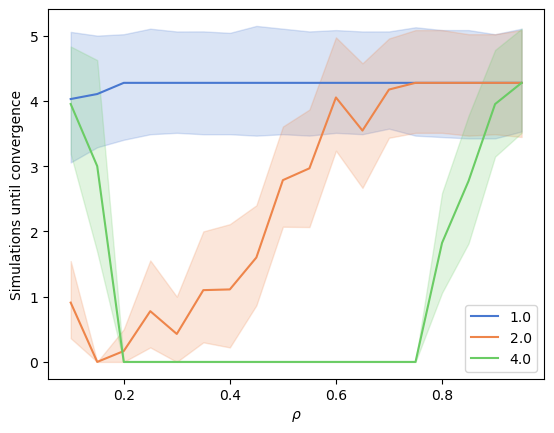

In [13]:
fig, ax = plt.subplots()
sns.lineplot(df_rho_s_data, x='rho', y='s', palette='muted', hue='n', errorbar=('ci', 95), ax=ax)
ax.set_xlabel('$\\rho$')
ax.set_ylabel('Simulations until convergence')
ax.legend()
plt.show()